In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn import metrics
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#Over Sampling and under sampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore");

In [5]:
df = pd.read_csv("30_inj_cyc_e059_deneme.csv")

In [6]:
df.head()

,Unnamed: 0,date,reason,timCool1,strCushion1,timFill1,prsHoldHyd1,velPlasticisation,prsTransferHyd1,decMold,...,sfc,frcClamp,prsBackHyd1,tmpBarrel1Zone5,tmpBarrel1Zone4,prsPomp1,tmpBarrel1Zone1,timPlasticisation1,tmpBarrel1Zone3,tmpBarrel1Zone2
0,7315,2021-01-25T13:13:32.000,[],27.4,16.8,2.54,125.2,78.0,124.7,2260,...,[],19726.0,25.9,240.5,250.1,20.3,249.6,21.96,250.1,252.3
1,9747,2021-01-14T05:33:31.000,[],27.2,14.2,2.56,136.9,78.0,136.7,2260,...,[],19808.0,26.1,238.5,247.8,1.1,250.0,17.20,249.4,252.7
2,9748,2021-01-13T20:23:04.000,[],27.2,14.1,2.56,137.8,78.0,137.6,2260,...,[],19703.0,25.9,240.3,250.0,7.1,249.9,20.52,251.2,251.4
3,9749,2021-01-14T05:29:52.000,[],27.2,14.1,2.56,139.5,78.0,139.7,2260,...,[],20420.0,26.1,240.9,250.4,6.3,250.0,16.48,250.7,250.0
4,9750,2021-01-14T05:30:48.000,[],27.2,14.4,2.61,142.2,78.0,142.7,2260,...,[],20585.0,26.2,241.1,251.0,3.2,250.1,16.10,251.4,251.2


In [7]:
df['reason'].unique()

array(['[]', '[532, 532]', '[532]', '[1, 1, 1]', '[1]', '[2]', '[4]',
       '[55]', '[10]', '[3]'], dtype=object)

In [10]:
df.columns

Index(['Unnamed: 0', 'date', 'reason', 'timCool1', 'strCushion1', 'timFill1',
       'prsHoldHyd1', 'velPlasticisation', 'prsTransferHyd1', 'decMold',
       'tmpOil', 'timestamp', 'cntCycle', 'stsMachine', 'strTransfer1',
       'timTransfer1', 'timCycle', 'sfc', 'frcClamp', 'prsBackHyd1',
       'tmpBarrel1Zone5', 'tmpBarrel1Zone4', 'prsPomp1', 'tmpBarrel1Zone1',
       'timPlasticisation1', 'tmpBarrel1Zone3', 'tmpBarrel1Zone2'],
      dtype='object')

In [11]:
drop_list = ["Unnamed: 0", "date", "decMold", "timestamp", "cntCycle", "stsMachine", "sfc"]
df = df.drop(drop_list, axis=1)

In [18]:
df = df.drop("velPlasticisation", axis=1)

In [19]:
df.head()

,reason,timCool1,strCushion1,timFill1,prsHoldHyd1,prsTransferHyd1,tmpOil,strTransfer1,timTransfer1,timCycle,frcClamp,prsBackHyd1,tmpBarrel1Zone5,tmpBarrel1Zone4,prsPomp1,tmpBarrel1Zone1,timPlasticisation1,tmpBarrel1Zone3,tmpBarrel1Zone2
0,0,27.4,16.8,2.54,125.2,124.7,45.5,22.0,2.54,54.52,19726.0,25.9,240.5,250.1,20.3,249.6,21.96,250.1,252.3
1,0,27.2,14.2,2.56,136.9,136.7,40.7,20.0,2.56,54.68,19808.0,26.1,238.5,247.8,1.1,250.0,17.20,249.4,252.7
2,0,27.2,14.1,2.56,137.8,137.6,45.0,20.0,2.56,54.28,19703.0,25.9,240.3,250.0,7.1,249.9,20.52,251.2,251.4
3,0,27.2,14.1,2.56,139.5,139.7,40.6,20.0,2.56,55.00,20420.0,26.1,240.9,250.4,6.3,250.0,16.48,250.7,250.0
4,0,27.2,14.4,2.61,142.2,142.7,40.6,20.0,2.61,52.58,20585.0,26.2,241.1,251.0,3.2,250.1,16.10,251.4,251.2


In [14]:
df['reason'] = df['reason'].replace(['[]'],0)
df['reason'][df['reason'] != 0] = 1

In [24]:
df = df.astype({"reason": int})

In [15]:
df.reason.value_counts()

0    14590
1       42
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

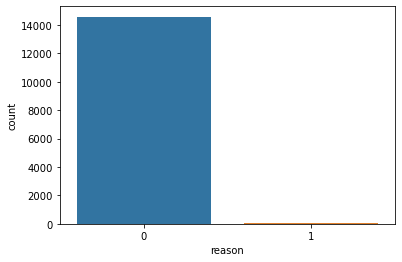

In [16]:
sns.countplot(x='reason',data=df)

In [23]:
df

,reason,timCool1,strCushion1,timFill1,prsHoldHyd1,prsTransferHyd1,tmpOil,strTransfer1,timTransfer1,timCycle,frcClamp,prsBackHyd1,tmpBarrel1Zone5,tmpBarrel1Zone4,prsPomp1,tmpBarrel1Zone1,timPlasticisation1,tmpBarrel1Zone3,tmpBarrel1Zone2
0,0,27.4,16.8,2.54,125.2,124.7,45.5,22.0,2.54,54.52,19726.0,25.9,240.5,250.1,20.3,249.6,21.96,250.1,252.3
1,0,27.2,14.2,2.56,136.9,136.7,40.7,20.0,2.56,54.68,19808.0,26.1,238.5,247.8,1.1,250.0,17.20,249.4,252.7
2,0,27.2,14.1,2.56,137.8,137.6,45.0,20.0,2.56,54.28,19703.0,25.9,240.3,250.0,7.1,249.9,20.52,251.2,251.4
3,0,27.2,14.1,2.56,139.5,139.7,40.6,20.0,2.56,55.00,20420.0,26.1,240.9,250.4,6.3,250.0,16.48,250.7,250.0
4,0,27.2,14.4,2.61,142.2,142.7,40.6,20.0,2.61,52.58,20585.0,26.2,241.1,251.0,3.2,250.1,16.10,251.4,251.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14627,0,27.2,16.8,2.54,125.7,125.2,45.1,22.0,2.54,54.42,20220.0,26.3,240.6,249.1,6.5,250.0,16.74,250.4,250.1
14628,0,27.2,16.7,2.52,125.7,125.4,44.8,22.0,2.52,54.32,20255.0,26.2,240.9,250.8,-0.2,250.1,16.60,250.2,250.3
14629,0,27.2,16.7,2.54,125.8,125.4,44.9,22.0,2.54,54.36,20479.0,26.2,241.4,249.4,0.6,250.1,16.68,250.4,250.3
14630,0,27.2,16.7,2.52,124.8,124.6,45.3,22.0,2.52,54.44,20208.0,26.2,240.1,250.2,0.0,250.0,16.72,249.5,250.3


<AxesSubplot:>

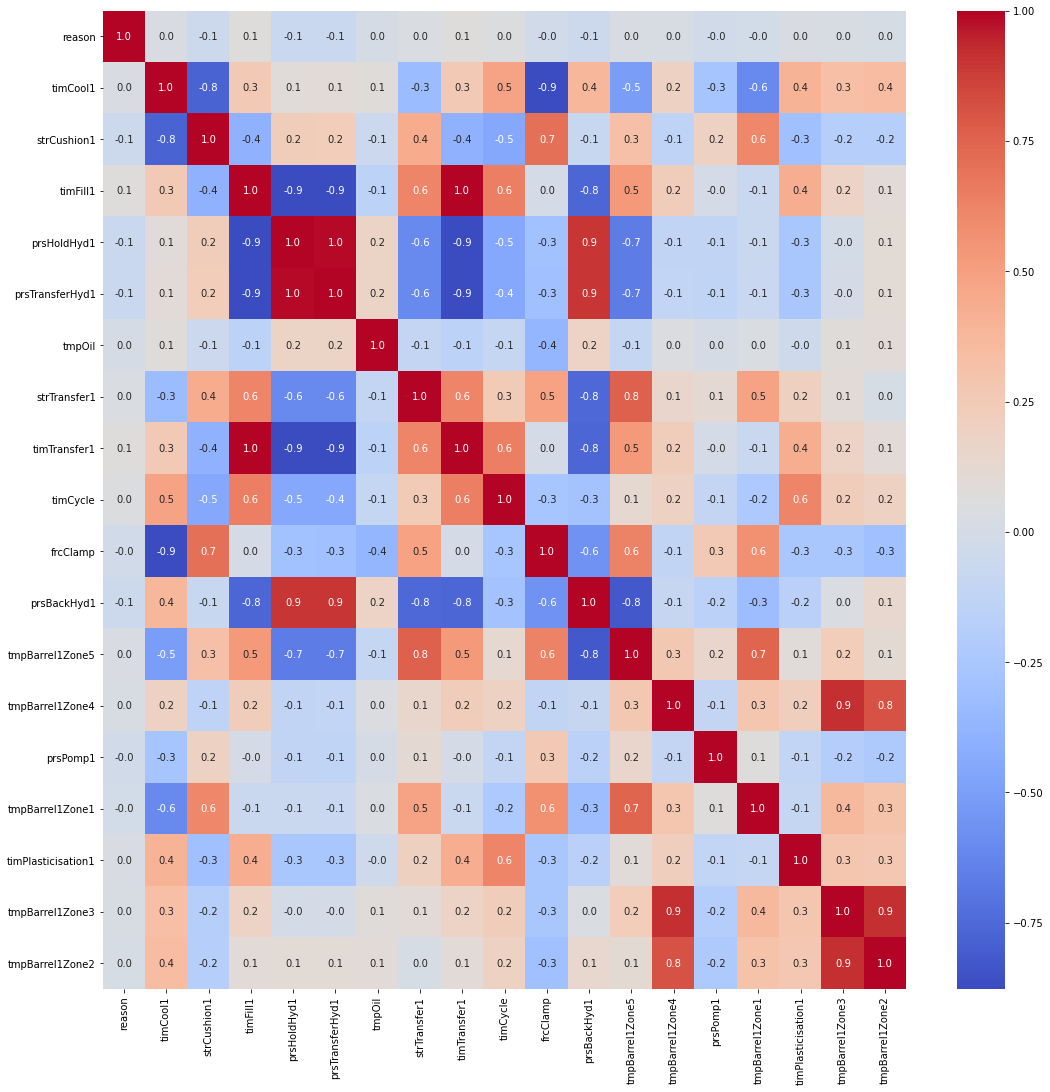

In [25]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', fmt='.1f')

In [27]:
#Class count
count_class_0, count_class_1 = df.reason.value_counts()
#Divide by class
df_class_0 = df[df['reason'] == 0]
df_class_1 = df[df['reason'] == 1]

In [ ]:
#Random Under-Sampling

In [28]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling:')
print(df_test_under.reason.value_counts())

Random under-sampling:
1    42
0    42
Name: reason, dtype: int64


In [29]:
y = df_test_under['reason']
X = df_test_under.drop(['reason'], axis=1)

In [30]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-2.455093,3.261197,-0.643311,0.426391,0.450373,0.461084,2.634371,-0.643311,-1.525782,2.797760,-0.727782,2.311505,0.411909,0.531201,3.255759,-0.957886,0.281193,-0.142307
1,0.491385,0.241402,0.585236,-0.526538,-0.511324,-4.918229,0.435492,0.585236,0.821050,2.184199,-0.727782,0.384978,0.177595,-0.853926,-0.159064,0.869450,0.138903,0.078242
2,0.619492,-0.577047,0.818391,-0.310122,-0.288868,0.999015,0.435492,0.818391,0.809501,-0.243968,-0.668429,0.556989,0.333805,0.022379,-0.159064,0.903987,0.186333,0.122352
3,0.619492,-0.562936,0.827358,-0.770878,-0.733781,0.999015,0.435492,0.827358,0.832600,-0.540582,-0.045221,0.625794,-0.056719,3.711341,-0.159064,0.357670,0.044042,0.431121
4,0.158305,0.326069,-1.315873,1.236206,1.220414,-1.690641,-1.363591,-1.315873,-0.925215,-0.499029,1.468282,-1.335136,0.685276,-0.924596,-0.159064,-1.259302,0.897786,0.960438


In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Confusion Matrix:
 [[8 1]
 [0 8]]
Accuracy:
 0.9411764705882353
Precision:
 0.8888888888888888
Recall:
 1.0
AUC:
 0.986111111111111


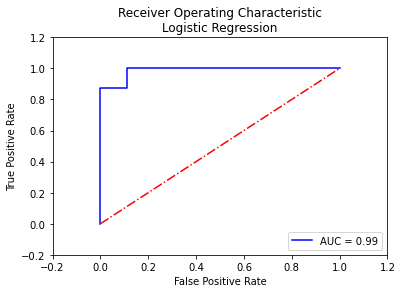

In [32]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_logreg=logreg.predict(X_val)
y_logreg_prob=logreg.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_logreg))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_logreg))
print("Precision:\n",metrics.precision_score(y_val,y_logreg))
print("Recall:\n",metrics.recall_score(y_val,y_logreg))
print("AUC:\n",metrics.roc_auc_score(y_val,y_logreg_prob))
auc=metrics.roc_auc_score(y_val,y_logreg_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

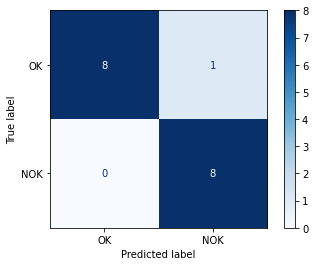

In [33]:
cm = metrics.confusion_matrix(y_val,y_logreg)
classNames = ['OK','NOK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

Confusion Matrix:
 [[8 1]
 [0 8]]
Accuracy:
 0.9411764705882353
Precision:
 0.8888888888888888
Recall:
 1.0
AUC:
 1.0


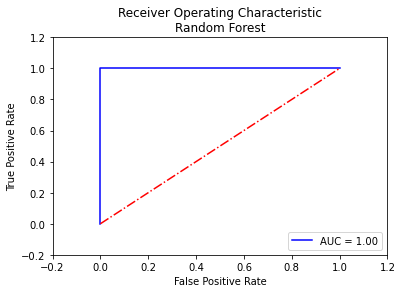

In [34]:
#Random Forest with 'entropy' criterion
from sklearn.ensemble import RandomForestClassifier

rf2=RandomForestClassifier(criterion='entropy',random_state=3)
rf2.fit(X_train,y_train)
y_rf2=rf2.predict(X_val)
y_rf_prob2=rf2.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf2))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf2))
print("Precision:\n",metrics.precision_score(y_val,y_rf2))
print("Recall:\n",metrics.recall_score(y_val,y_rf2))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob2))
auc=metrics.roc_auc_score(y_val,y_rf_prob2)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob2)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

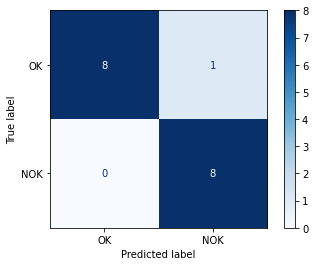

In [35]:
cm = metrics.confusion_matrix(y_val,y_rf2)
classNames = ['OK','NOK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

In [36]:
y_smote = df['reason']
X_smote = df.drop(['reason'], axis=1)

In [38]:
scaler = preprocessing.StandardScaler().fit(X_smote)
X_smote = scaler.transform(X_smote)
X_smote = pd.DataFrame(X_smote)
X_smote.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.359368,0.007309,-0.758960,0.955127,0.943012,0.994129,-0.635845,-0.758960,-0.308579,-0.684156,0.922781,-0.603036,0.437678,1.700318,-0.355879,0.089383,0.355777,1.008176
1,0.316095,-0.357366,-0.749517,1.348622,1.347344,-7.488898,-0.965640,-0.749517,-0.294759,-0.654677,0.951445,-1.171291,-0.282616,-0.999980,-0.282569,-0.351040,0.049016,1.169227
2,0.316095,-0.371392,-0.749517,1.378891,1.377669,0.110480,-0.965640,-0.749517,-0.329307,-0.692425,0.922781,-0.659861,0.406361,-0.156137,-0.300896,-0.043854,0.837829,0.645811
3,0.316095,-0.371392,-0.749517,1.436066,1.448427,-7.665628,-0.965640,-0.749517,-0.267121,-0.434661,0.951445,-0.489384,0.531629,-0.268649,-0.282569,-0.417659,0.618715,0.082132
4,0.316095,-0.329314,-0.725908,1.526872,1.549510,-7.665628,-0.965640,-0.725908,-0.476136,-0.375343,0.965777,-0.432559,0.719532,-0.704635,-0.264241,-0.452819,0.925475,0.565285


In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, shuffle=True)

In [40]:
sm=SMOTE(random_state=2)
X_sm,y_sm=sm.fit_resample(X_train,y_train)
print(X_sm.shape,y_sm.shape)
print(len(y_sm[y_sm==1]),len(y_sm[y_sm==0]))

(23342, 18) (23342,)
11671 11671


In [41]:
y_val.value_counts()

0    2919
1       8
Name: reason, dtype: int64

Confusion Matrix:
 [[2336  583]
 [   2    6]]
Accuracy:
 0.8001366586949095
Precision:
 0.010186757215619695
Recall:
 0.75
AUC:
 0.8827509421034601


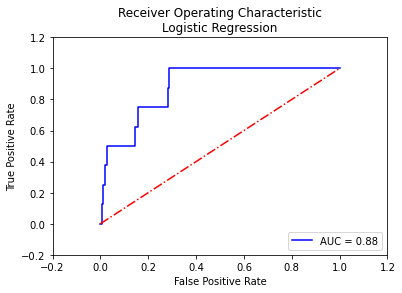

In [42]:
logreg=LogisticRegression()
logreg.fit(X_sm,y_sm)
y_logreg=logreg.predict(X_val)
y_logreg_prob=logreg.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_logreg))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_logreg))
print("Precision:\n",metrics.precision_score(y_val,y_logreg))
print("Recall:\n",metrics.recall_score(y_val,y_logreg))
print("AUC:\n",metrics.roc_auc_score(y_val,y_logreg_prob))
auc=metrics.roc_auc_score(y_val,y_logreg_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix:
 [[2917    2]
 [   8    0]]
Accuracy:
 0.9965835326272634
Precision:
 0.0
Recall:
 0.0
AUC:
 0.9202209660842754


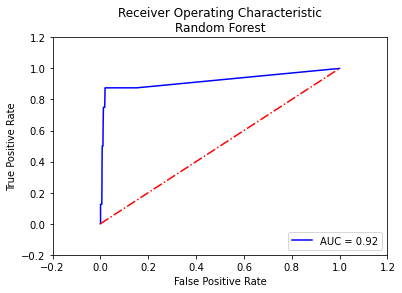

In [43]:
#Random Forest with 'entropy' criterion
from sklearn.ensemble import RandomForestClassifier

rf2=RandomForestClassifier(criterion='entropy',random_state=3)
rf2.fit(X_sm,y_sm)
y_rf2=rf2.predict(X_val)
y_rf_prob2=rf2.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf2))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf2))
print("Precision:\n",metrics.precision_score(y_val,y_rf2))
print("Recall:\n",metrics.recall_score(y_val,y_rf2))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob2))
auc=metrics.roc_auc_score(y_val,y_rf_prob2)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob2)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()